# Practical 2: Hierarchical Clustering and linkage measures

**Course:** WBCS032-05 Introduction to Machine Learning  
**Student Names:**  

Rik de Hoop (s5303893) & Avery Kozák (s5559294)
---

## Assignment Overview

In this assignment, you will implement the agglomerative hierarchical clustering algorithm as introduced and discussed in class, using Euclidean distance. Consider

(a) different linkage measures: *single*, *average*, *complete*, and *ward* linkage functions.

(b) three different choices for the number of clusters K = 2, 3, 4.

You will work with the data `data_clustering.csv`, which contains 200
two-dimensional feature vectors. There are no labels associated with the data points.

## 1. Introduction (1 point)

Describe the goal of this assignment.

**Your answer here:**

The goal of this assignment is to understand and apply agglomerative hierarchical clustering on an unlabeled dataset. We investigate how different linkage measures (single, average, complete, and ward) and different numbers of clusters (K = 2, 3, 4) affect the clustering results. Additionally, we implement evaluation metrics such as the silhouette score, within-cluster sum of squares (WSS), and between-cluster sum of squares (BSS) to quantitatively assess clustering quality, and visualize the results using scatter plots and dendrograms.

## 2. Methods (3 points)

### 2.1 Explain agglomerative hierarchical clustering algorithm (0.5 points)

Explain the algorithm in a general manner, including different linkage measures.

**Your answer here:**
Algorithm steps:
- take all points as clusters
- compute the difference between allclusters
- find the clusters witht the smallest distance according to the linkage measure
- merge these two clusters
- update the distance and go bak to computing distance step, until:
- the desired number of clusters has been found

difference in linkage measures:

- single: smallest distance between single points of clusters
- average: distance between the average of points of clusters
- complete: largest difference between points of clusters
- ward: minimizes cluster variance

### 2.2 Implementation (2.5 points)

You are allowed to implement the algorithm using built-in functions from *sklearn* for linkage measures and the dendrogram. You need to implement the evaluation metrics (incl. silhouette score, within-cluster sum of squares and between-cluster sum of squares) **yourself**. Both the code quality and correctness will be graded.

*__Note:__* **Do not change the cell labels! Themis will use them to automatically grade your submission.**

In [1]:
# Load required libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Data configuration
data_file_path = 'data_clustering.csv'
df = pd.read_csv(data_file_path, header=None)
data = np.array(df)

# Linkage measures
linkage_measures = ["single", "average", "complete", "ward"]

# The number of clusters
clusters_K = [2, 3, 4]

Write code in the cell below to visualize the input data.

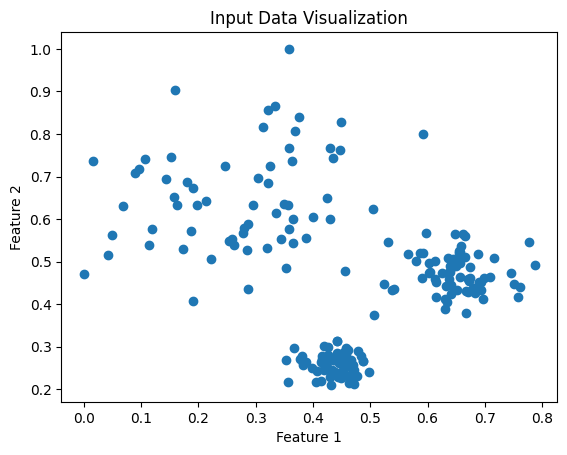

In [2]:
plt.scatter(data[:, 0], data[:, 1])
plt.title("Input Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In the cell below, write code to perform hierarchical clustering using sklearn. Use the different linkage measures and number of clusters specified above. Store the cluster labels for each combination of linkage measure and number of clusters in a dictionary.

In [3]:
all_labels = {}

for linkage_measure in linkage_measures:
    for k in clusters_K:
        model = AgglomerativeClustering(
            n_clusters=k,
            linkage=linkage_measure
        )
        labels = model.fit_predict(data)
        all_labels[(linkage_measure, k)] = labels

# print(all_labels.keys())

In the cells below, complete the implementation of the evaluation metrics (silhouette score, within-cluster sum of squares and between-cluster sum of squares).

In [4]:
def silhouette_score_defined(input_data, labels):
    """
    Compute the self-defined Silhouette Score.

    Args:
        input_data (ndarray): Data points.
        labels (ndarray): Labels of the data points.

    Returns:
        float: The mean silhouette score for all points.
    """
    n = len(input_data)
    unique_labels = np.unique(labels)
    silhouette_values = []
    
    for i in range(n):
        point = input_data[i]
        label_i = labels[i]
        
        same_cluster_indices = np.where(labels == label_i)[0]
        same_cluster_indices = same_cluster_indices[same_cluster_indices != i]
        
        if len(same_cluster_indices) > 0:
            distances = np.linalg.norm(
                input_data[same_cluster_indices] - point,
                axis=1
            )
            a = np.mean(distances)
        else:
            a = 0
        
        b = np.inf
        
        for other_label in unique_labels:
            if other_label == label_i:
                continue
            
            other_cluster_indices = np.where(labels == other_label)[0]
            distances = np.linalg.norm(
                input_data[other_cluster_indices] - point,
                axis=1
            )
            mean_distance = np.mean(distances)
            b = min(b, mean_distance)
        
        if max(a, b) > 0:
            s = (b - a) / max(a, b)
        else:
            s = 0
        
        silhouette_values.append(s)
    
    return np.mean(silhouette_values)

# labels = all_labels[("ward", 3)]
# score = silhouette_score_defined(data, labels)
# print(score)

# print(silhouette_score(data, all_labels[("ward", 3)]))
# running these statements shows that the self defined method is slightly off

In [ ]:
def compute_wss_bss(input_data, labels):
    """
    Compute Within-Cluster Sum of Squares (WSS) and Between-Cluster Sum of Squares (BSS).

    Args:
        input_data (ndarray): Data points.
        labels (ndarray): Labels of the data points.
        
    Returns:
        tuple: (WSS, BSS)
    """
    unique_labels = np.unique(labels)
    overall_mean = np.mean(input_data, axis=0)
    
    WSS = 0
    BSS = 0
    
    for label in unique_labels:
        cluster_points = input_data[labels == label]
        n_points = len(cluster_points)
        
        centroid = np.mean(cluster_points, axis=0)
        
        WSS += np.sum((cluster_points - centroid) ** 2)
        
        BSS += n_points * np.sum((centroid - overall_mean) ** 2)
    
    return WSS, BSS

# labels = all_labels[("ward", 3)]
# score = compute_wss_bss(data, labels)
# print(score)


(np.float64(2.4144958870586133), np.float64(9.699197326029985))


## 3. Experimental Results (4 points)

*__Note:__* This section **is graded** by Themis.

### 3.1 Qualitative result

1. Implement `plot_dendrogram(input_data, linkage_measure, cutoff)` - Plot a dendrogram for the given linkage measure and indicate the corresponding cut-off thresholds using dashed horizontal lines.

2. Implement `plot_clustering_results(input_data, k, linkage_measure)` - Plot the clustering results for a given number of clusters and linkage measure.


In [ ]:
def plot_dendrogram(input_data, linkage_measure, cutoff):
    """
    Plot a single dendrogram, based on the given parameters.

    Args:
        input_data (ndarray): Data points.
        linkage_measure (str): The linkage measure (e.g. 'single').
        cutoff (list): List of cut-off thresholds.
    """

    # TODO: Implement the dendrogram plotting.
    
    pass

In [ ]:
def plot_clustering_results(input_data, k, linkage_measure):
    """
    Plot clustering results for given k and linkage measure.

    Args:
        input_data (ndarray): Data points.
        k (int): Number of clusters.
        linkage_measure (str): Linkage measure used for clustering.
    """
    
    # TODO: Implement the clustering results plotting.
    
    pass

### 3.2 Quantitative result

1. Implement `compute_silhouette_scores(input_data, k, linkage_measure)` - Compute and return the silhouette score for the given clustering configuration.

2. Implement `compute_wss_bss_scores(input_data, k, linkage_measure)` - Compute and return the within-cluster sum of squares (WSS) and between-cluster sum of squares (BSS) for the given clustering configuration.

In [ ]:
def compute_silhouette_scores(input_data, k, linkage_measure):
    """
    Compute silhouette scores for different clustering results.

    Args:
        input_data (ndarray): Data points.
        k (int): Number of clusters.
        linkage_measure (str): Linkage measure used for clustering.
        
    Returns:
        float: Silhouette score for the given clustering configuration.
    """

    # TODO: Implement the silhouette score calculation for the given clustering configuration.
    
    pass

In [ ]:
def compute_wss_bss_scores(input_data, k, linkage_measure):
    """
    Compute WSS and BSS scores for different clustering results.

    Args:
        input_data (ndarray): Data points.
        k (int): Number of clusters.
        linkage_measure (str): Linkage measure used for clustering.
        
    Returns:
        tuple: WSS and BSS scores for the given clustering configuration.
    """

    # TODO: Implement the WSS and BSS score calculation for the given clustering configuration.
    
    pass

## 4. Discussion (2 points)

Discuss your observations on both the qualitative and quantitative results, and conclusions for the best choice of linkage measures and the number of clusters.

**Your answer here:**

## Contribution

State your individual contribution.

**Your answer here:**